# Data collection

In [ ]:
import requests
from bs4 import BeautifulSoup

def scrape_jobstreet_page(url):
    """Scrapes a single JobStreet page and extracts job listing URLs."""
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find job listing elements (replace with actual selectors based on JobStreet's HTML structure)
        job_listings = soup.find_all('div', class_='snwpn00 l1r1184z l1r1184x')  # Replace with actual class

        job_urls = []
        for job in job_listings:
            # Extract job URL using the appropriate selector
            job_url = job.find('a', href=True)['href']
            job_urls.append(f"https://my.jobstreet.com{job_url}")  # Construct full URL

        return job_urls
    else:
        print(f"Error: Failed to download page {url}. Status code: {response.status_code}")
        return []

def scrape_all_pages(base_url, num_pages):
    """Scrapes all JobStreet pages (up to the specified number) and extracts job listing URLs."""
    all_job_urls = []
    for page_num in range(1, num_pages + 1):
        page_url = f"{base_url}?page={page_num}"  # Construct URL with page number
        job_urls = scrape_jobstreet_page(page_url)
        all_job_urls.extend(job_urls)

    return all_job_urls

if __name__ == "__main__":
    base_url = "https://my.jobstreet.com/data-analyst-jobs"
    num_pages = 40  # Number of pages to scrape (adjust as needed)

    all_job_urls = scrape_all_pages(base_url, num_pages)

    print(f"Scraped a total of {len(all_job_urls)} job listing URLs.")



In [ ]:
data = []
# Iterate over each URL in the sliced list
for url in all_job_urls:
    # Send a GET request to the URL
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')

        # Extract information from the page as needed
        # Example: Extract the title of the page
        title = soup.title.text.strip()


        advertiser = soup.find('span', class_='snwpn00 l1r1184z l1r118i7 _1l99f880 _1l99f881 _1l99f8821 v7shb4 _1l99f88a', attrs={'data-automation': 'advertiser-name'})
        if advertiser and advertiser.text.strip():
            advertiser = advertiser.text.strip()
        else:
            advertiser = None  # Assign None or skip this URL entirely

        classification_span = soup.find('span', class_='snwpn00 l1r1184z _1l99f880 _1l99f881 _1l99f8821 v7shb4 _1l99f887', attrs={'data-automation': 'job-detail-classifications'})
        if classification_span:
            classification_link = classification_span.find('a', class_='snwpn00 snwpn0f snwpn00 snwpn0f _6zsahd0')
            if classification_link:
                job_classification = classification_link.text.strip()
            else:
                job_classification = None
        else:
            job_classification = None



        salary_span = soup.find('span', class_='snwpn00 l1r1184z _1l99f880 _1l99f881 _1l99f8821 v7shb4 _1l99f887', attrs={'data-automation': 'job-detail-salary'})
        if salary_span:
            salary = salary_span.text.strip()
        else:
            salary = "NA"


        description = soup.find('div', class_='snwpn00 l1r1185b l1r118hf l1r1186z').text.strip().lower()




        # Example: Extract any other relevant information
        # (You'll need to inspect the HTML structure of the page to know how to extract specific information)

        data.append({
            'title': title,
            'salary': salary,
            'company': advertiser,
            'job_classification': job_classification,
            'description': description
        })

In [ ]:
import pandas as pd

df = pd.DataFrame(data)

df.to_csv('jobstreet2_data.csv', index=False)

# 1) LOAD DATASET AND EXAMINE DATASET STRUCTURES

## **DATASET COLLECTION**
### This analysis will be analysing job listings advertised on Jobstreet website. Jobsearch was filtered to 'data-analyst', and all the related job listings were taken regardless of location and salary.

## **CASE STUDY**
### The primary goal of this case study is to analyze job listings for Data Analyst roles in Malaysia, focusing on understanding the relationships between job characteristics (like job sector, location, and required skills) and salary levels.

###

In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

In [3]:
df = pd.read_csv('/jobstreet2_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               1280 non-null   object
 1   salary              302 non-null    object
 2   company             603 non-null    object
 3   job_classification  1272 non-null   object
 4   description         1280 non-null   object
dtypes: object(5)
memory usage: 50.1+ KB


In [ ]:
df.head(10)

,title,salary,company,job_classification,description
0,"Data Analyst Job in Klang/Port Klang, Selangor...","RM 4,000 – RM 6,000 per month",Kawan Food Manufacturing Sdn Bhd,"Mathematics, Statistics & Information Sciences...",data analystkawan food manufacturing sdn bhd 3...
1,"Data Analyst Job in Bandar Sunway, Selangor - ...",NaN,Credit Bureau Malaysia Sdn Bhd,Analysis & Reporting (Banking & Financial Serv...,data analystcredit bureau malaysia sdn bhd 4.2...
2,E-commerce Data Analyst - OPEN FOR FRESH GRADU...,"RM 2,500 – RM 3,500 per month",Synergy House Furniture Sdn Bhd - Location at ...,Analysis & Reporting (Sales),e-commerce data analyst - open for fresh gradu...
3,"Business Analyst Job in KL Eco City, Kuala Lum...","RM 5,500 – RM 8,250 per month",NaN,Business/Systems Analysts (Information & Commu...,business analystgogeek sdn bhdview all jobskl ...
4,"Data Analyst Executive Job in Subang Jaya, Sel...","RM 3,500 – RM 5,000 per month",BELIVE VENTURES SDN. BHD.,Business/Systems Analysts (Information & Commu...,data analyst executivebelive ventures sdn. bhd...
5,Business Analyst - Analyst / Snr Analyst Job i...,"RM 5,300 – RM 6,300 per month",Avanade Malaysia Sdn Bhd,Business/Systems Analysts (Information & Commu...,business analyst - analyst / snr analystavanad...
6,Data Analytics - Junior （gaming） Job in Johor ...,"RM 3,500 – RM 5,000 per month",NaN,"Mathematics, Statistics & Information Sciences...",data analytics - junior （gaming）techtrend solu...
7,Business Analyst (Software Application) Job in...,NaN,AIA Digital+ Malaysia,Business/Systems Analysts (Information & Commu...,business analyst (software application)aia dig...
8,Data Analyst Job in Kuala Lumpur - Jobstreet,NaN,SEEK,Business/Systems Analysts (Information & Commu...,data analystseek view all jobskuala lumpurbusi...
9,"Service Delivery Manager, Data and Report Plat...",NaN,Carlsberg Brewery Malaysia Bhd,Management (Information & Communication Techno...,"service delivery manager, data and report plat..."


### Based on the data described, this dataset originally consist of 5 categorical features. Necessary preprocessing steps will be conducted to ensure accurate further analysis. Among preprocessing steps include:

*   converting 'salary' into numerical type
*   extracting additional features from 'title' into 'location' and 'states'
*   extract additional feature from 'job_classification' into 'job_sector'

---






# 2) DATA PREPROCESSING

### **Converting 'salary' into numerical type.**
Current input for salary data is in ranges of minimum salary to maximum salary. Preprocessing this column will generate 2 new column of 'max_salary' and 'min_salary'.

In [5]:
# split 'salary' into 'min_salary' and 'max_salary'

def process_salary(salary):
    salary = str(salary)
    salary = salary.replace('RM', '').replace('per month', '').strip()
    if '–' in salary:
        min_sal, max_sal = salary.split(' – ')
        min_sal = min_sal.replace(',', '').strip() # Remove commas
        max_sal = max_sal.replace(',', '').strip() # Remove commas
        return min_sal, max_sal
    else:
        salary = salary.replace(',', '') # Remove commas
        return salary, salary

df[['min_salary', 'max_salary']] = df['salary'].apply(process_salary).tolist()



In [6]:
# prompt: remove nan as null value in min_salary and max_salary

# Convert 'min_salary' and 'max_salary' columns to numeric, coercing errors to NaN
df['min_salary'] = pd.to_numeric(df['min_salary'], errors='coerce')
df['max_salary'] = pd.to_numeric(df['max_salary'], errors='coerce')


df.head(5)

,title,salary,company,job_classification,description,min_salary,max_salary
0,"Data Analyst Job in Klang/Port Klang, Selangor...","RM 4,000 – RM 6,000 per month",Kawan Food Manufacturing Sdn Bhd,"Mathematics, Statistics & Information Sciences...",data analystkawan food manufacturing sdn bhd 3...,4000.0,6000.0
1,"Data Analyst Job in Bandar Sunway, Selangor - ...",NaN,Credit Bureau Malaysia Sdn Bhd,Analysis & Reporting (Banking & Financial Serv...,data analystcredit bureau malaysia sdn bhd 4.2...,NaN,NaN
2,E-commerce Data Analyst - OPEN FOR FRESH GRADU...,"RM 2,500 – RM 3,500 per month",Synergy House Furniture Sdn Bhd - Location at ...,Analysis & Reporting (Sales),e-commerce data analyst - open for fresh gradu...,2500.0,3500.0
3,"Business Analyst Job in KL Eco City, Kuala Lum...","RM 5,500 – RM 8,250 per month",NaN,Business/Systems Analysts (Information & Commu...,business analystgogeek sdn bhdview all jobskl ...,5500.0,8250.0
4,"Data Analyst Executive Job in Subang Jaya, Sel...","RM 3,500 – RM 5,000 per month",BELIVE VENTURES SDN. BHD.,Business/Systems Analysts (Information & Commu...,data analyst executivebelive ventures sdn. bhd...,3500.0,5000.0


### **Extracting input from 'title' into 2 new column; 'location' and 'states'**

The 'title' column for the original dataset consist of position title and the location. For example **Data Analyst Job in Bandar Sunway, Selangor**. Preprocessing this column will generate 2 new column which are 'location' and 'states'. This preprocessing will be using str.replace and str.split.

In [7]:
df['title'] = df['title'].str.replace('- Jobstreet', '')

In [8]:
# prompt: create new column called 'location' by splitting 'title' from 'job in', and remove the 'job in' phrase from location column

# Create 'location' column by splitting 'title' at 'Job in'
df['location'] = df['title'].str.split('Job in').str[1].str.replace('Job in', '').str.strip()
df['states'] = df['location'].str.split(',').str[-1].str.strip()

df.head(5)


,title,salary,company,job_classification,description,min_salary,max_salary,location,states
0,"Data Analyst Job in Klang/Port Klang, Selangor","RM 4,000 – RM 6,000 per month",Kawan Food Manufacturing Sdn Bhd,"Mathematics, Statistics & Information Sciences...",data analystkawan food manufacturing sdn bhd 3...,4000.0,6000.0,"Klang/Port Klang, Selangor",Selangor
1,"Data Analyst Job in Bandar Sunway, Selangor",NaN,Credit Bureau Malaysia Sdn Bhd,Analysis & Reporting (Banking & Financial Serv...,data analystcredit bureau malaysia sdn bhd 4.2...,NaN,NaN,"Bandar Sunway, Selangor",Selangor
2,E-commerce Data Analyst - OPEN FOR FRESH GRADU...,"RM 2,500 – RM 3,500 per month",Synergy House Furniture Sdn Bhd - Location at ...,Analysis & Reporting (Sales),e-commerce data analyst - open for fresh gradu...,2500.0,3500.0,"Setia Alam, Selangor",Selangor
3,"Business Analyst Job in KL Eco City, Kuala Lum...","RM 5,500 – RM 8,250 per month",NaN,Business/Systems Analysts (Information & Commu...,business analystgogeek sdn bhdview all jobskl ...,5500.0,8250.0,"KL Eco City, Kuala Lumpur",Kuala Lumpur
4,"Data Analyst Executive Job in Subang Jaya, Sel...","RM 3,500 – RM 5,000 per month",BELIVE VENTURES SDN. BHD.,Business/Systems Analysts (Information & Commu...,data analyst executivebelive ventures sdn. bhd...,3500.0,5000.0,"Subang Jaya, Selangor",Selangor


In [9]:
# Remove characters after "Job in..." in the 'title' column
df['title'] = df['title'].str.split('Job in').str[0]

# Remove characters after the comma in the 'location' column
df['location'] = df['location'].str.replace(',.*$', '', regex=True).str.strip()
df.head(5)

,title,salary,company,job_classification,description,min_salary,max_salary,location,states
0,Data Analyst,"RM 4,000 – RM 6,000 per month",Kawan Food Manufacturing Sdn Bhd,"Mathematics, Statistics & Information Sciences...",data analystkawan food manufacturing sdn bhd 3...,4000.0,6000.0,Klang/Port Klang,Selangor
1,Data Analyst,NaN,Credit Bureau Malaysia Sdn Bhd,Analysis & Reporting (Banking & Financial Serv...,data analystcredit bureau malaysia sdn bhd 4.2...,NaN,NaN,Bandar Sunway,Selangor
2,E-commerce Data Analyst - OPEN FOR FRESH GRADU...,"RM 2,500 – RM 3,500 per month",Synergy House Furniture Sdn Bhd - Location at ...,Analysis & Reporting (Sales),e-commerce data analyst - open for fresh gradu...,2500.0,3500.0,Setia Alam,Selangor
3,Business Analyst,"RM 5,500 – RM 8,250 per month",NaN,Business/Systems Analysts (Information & Commu...,business analystgogeek sdn bhdview all jobskl ...,5500.0,8250.0,KL Eco City,Kuala Lumpur
4,Data Analyst Executive,"RM 3,500 – RM 5,000 per month",BELIVE VENTURES SDN. BHD.,Business/Systems Analysts (Information & Commu...,data analyst executivebelive ventures sdn. bhd...,3500.0,5000.0,Subang Jaya,Selangor


###**Extracting input from 'job_classification' into new column 'job_sector'**

Input for 'job_classification' is written such as 'Analysis & Reporting (Sales)'. 'job_sector' will be generated by splitting 'job_classification' at the occurrence of ' ( '.

In [10]:
df['job_sector'] = df['job_classification'].str.split('(').str[-1].str.replace(')','').str.strip()

In [11]:
df['job_classification'] = df['job_classification'].str.split('(').str[0].str.strip()
df = df.rename(columns={'job_classification': 'job_role'})
df.head(10)

,title,salary,company,job_role,description,min_salary,max_salary,location,states,job_sector
0,Data Analyst,"RM 4,000 – RM 6,000 per month",Kawan Food Manufacturing Sdn Bhd,"Mathematics, Statistics & Information Sciences",data analystkawan food manufacturing sdn bhd 3...,4000.0,6000.0,Klang/Port Klang,Selangor,Science & Technology
1,Data Analyst,NaN,Credit Bureau Malaysia Sdn Bhd,Analysis & Reporting,data analystcredit bureau malaysia sdn bhd 4.2...,NaN,NaN,Bandar Sunway,Selangor,Banking & Financial Services
2,E-commerce Data Analyst - OPEN FOR FRESH GRADU...,"RM 2,500 – RM 3,500 per month",Synergy House Furniture Sdn Bhd - Location at ...,Analysis & Reporting,e-commerce data analyst - open for fresh gradu...,2500.0,3500.0,Setia Alam,Selangor,Sales
3,Business Analyst,"RM 5,500 – RM 8,250 per month",NaN,Business/Systems Analysts,business analystgogeek sdn bhdview all jobskl ...,5500.0,8250.0,KL Eco City,Kuala Lumpur,Information & Communication Technology
4,Data Analyst Executive,"RM 3,500 – RM 5,000 per month",BELIVE VENTURES SDN. BHD.,Business/Systems Analysts,data analyst executivebelive ventures sdn. bhd...,3500.0,5000.0,Subang Jaya,Selangor,Information & Communication Technology
5,Business Analyst - Analyst / Snr Analyst,"RM 5,300 – RM 6,300 per month",Avanade Malaysia Sdn Bhd,Business/Systems Analysts,business analyst - analyst / snr analystavanad...,5300.0,6300.0,Kelana Jaya,Selangor,Information & Communication Technology
6,Data Analytics - Junior （gaming）,"RM 3,500 – RM 5,000 per month",NaN,"Mathematics, Statistics & Information Sciences",data analytics - junior （gaming）techtrend solu...,3500.0,5000.0,Johor Bahru,Johor,Science & Technology
7,Business Analyst (Software Application),NaN,AIA Digital+ Malaysia,Business/Systems Analysts,business analyst (software application)aia dig...,NaN,NaN,Kuala Lumpur,Kuala Lumpur,Information & Communication Technology
8,Data Analyst,NaN,SEEK,Business/Systems Analysts,data analystseek view all jobskuala lumpurbusi...,NaN,NaN,Kuala Lumpur,Kuala Lumpur,Information & Communication Technology
9,"Service Delivery Manager, Data and Report Plat...",NaN,Carlsberg Brewery Malaysia Bhd,Management,"service delivery manager, data and report plat...",NaN,NaN,Shah Alam,Selangor,Information & Communication Technology


### **Remove empty rows**

Most of analysis will be conducted by analysing salary, therefore rows with empty 'salary' will be removed.

In [ ]:
df_new = df.dropna(subset=['max_salary'])

df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279 entries, 0 to 1266
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        279 non-null    object 
 1   salary       279 non-null    object 
 2   company      258 non-null    object 
 3   job_role     279 non-null    object 
 4   description  279 non-null    object 
 5   min_salary   279 non-null    float64
 6   max_salary   279 non-null    float64
 7   location     279 non-null    object 
 8   states       279 non-null    object 
 9   job_sector   279 non-null    object 
dtypes: float64(2), object(8)
memory usage: 24.0+ KB


### **Create new column 'average salary'**

In [12]:
# Create a copy explicitly
df_salary = df[['min_salary', 'max_salary']].copy()

# Calculate avg_salary explicitly using .loc
df_salary['avg_salary'] = (df_salary['min_salary'] + df_salary['max_salary']) / 2

# Assuming df_salary and df_new are already defined DataFrames.
# and df_salary has a column named 'avg_salary'

df_new['avg_salary'] = df_salary['avg_salary']

df_new.head()

NameError: name 'df_new' is not defined

### Preprocessing steps are completed. In summary, data preprocessing for this analysis include:
* **Feature Extraction**
  - convert 'salary' into numerical data represented by 'min_salary' and 'max_salary
  - splitting input from 'title' into 'location' and 'states'
  - splitting 'job_role' into 'job_sector'
  - removing null rows from the whole dataframe based on 'max_salary'
  - calculate 'avg_salary' from 'min_salary' and 'max_salary'

  From this preprocessing, new_df will be used for subsequent analysis.
   
  new_df is now consist of 279 rows with 11 features.

---



# 3) EXPLORATORY DATA ANALYSIS

### Summary of job role and job sector that are related to 'data analysts'

In [ ]:
df_new['job_role'].value_counts().nlargest(20)

,count
job_role,
Business/Systems Analysts,46
Analysis & Reporting,24
Database Development & Administration,19
Developers/Programmers,15
Digital & Search Marketing,15
Data Entry & Word Processing,12
Other,10
Financial Accounting & Reporting,10
Consultants,9


In [ ]:
def industry_by_job_classification(df):
    """
    Lists industries for the top 5 job role.

    Args:
      df: DataFrame with 'job_role' and 'job_sector' columns.
    """

    # Calculate the top 5 job classifications
    top_5_jobs = df['job_role'].value_counts().nlargest(5).index

    # Iterate through the top 5 job classifications and print the industries
    for job in top_5_jobs:
        industries = df[df['job_role'] == job]['job_sector'].unique()
        print(f"Job Role: {job}")
        for industry in industries:
          print(f"- {industry}")
        print()

# Assuming your DataFrame is called 'df_new'
industry_by_job_classification(df_new)

Job Role: Business/Systems Analysts
- Information & Communication Technology

Job Role: Analysis & Reporting
- Sales
- Banking & Financial Services
- Mining, Resources & Energy
- Accounting
- Manufacturing, Transport & Logistics

Job Role: Database Development & Administration
- Information & Communication Technology

Job Role: Developers/Programmers
- Information & Communication Technology

Job Role: Digital & Search Marketing
- Marketing & Communications



In [ ]:

def top_10_job_sectors(df):
    """
    Groups by the top 10 most frequent job sectors and lists the job roles within each sector.
    """
    top_sectors = df['job_sector'].value_counts().nlargest(5).index
    for sector in top_sectors:
        job_roles = df[df['job_sector'] == sector]['job_role'].unique()
        print(f"Job Sector: {sector}")
        for role in job_roles:
            print(f"- {role}")
        print()

# Example usage (replace with your actual DataFrame)
top_10_job_sectors(df_new)

Job Sector: Information & Communication Technology
- Business/Systems Analysts
- Developers/Programmers
- Engineering - Software
- Database Development & Administration
- Consultants
- Testing & Quality Assurance
- Other
- Help Desk & IT Support
- Product Management & Development
- Security
- Architects
- Networks & Systems Administration

Job Sector: Accounting
- Audit - Internal
- Financial Accounting & Reporting
- Cost Accounting
- Analysis & Reporting
- Taxation
- Management
- Management Accounting & Budgeting
- Treasury
- Business Services & Corporate Advisory
- Payroll

Job Sector: Marketing & Communications
- Market Research & Analysis
- Digital & Search Marketing
- Marketing Assistants/Coordinators
- Marketing Communications

Job Sector: Banking & Financial Services
- Analysis & Reporting
- Compliance & Risk
- Financial Planning
- Client Services
- Settlements
- Banking - Corporate & Institutional
- Funds Management
- Credit
- Banking - Business

Job Sector: Administration & Of

### Visualizing scatter plot to see distribution of salary and industry

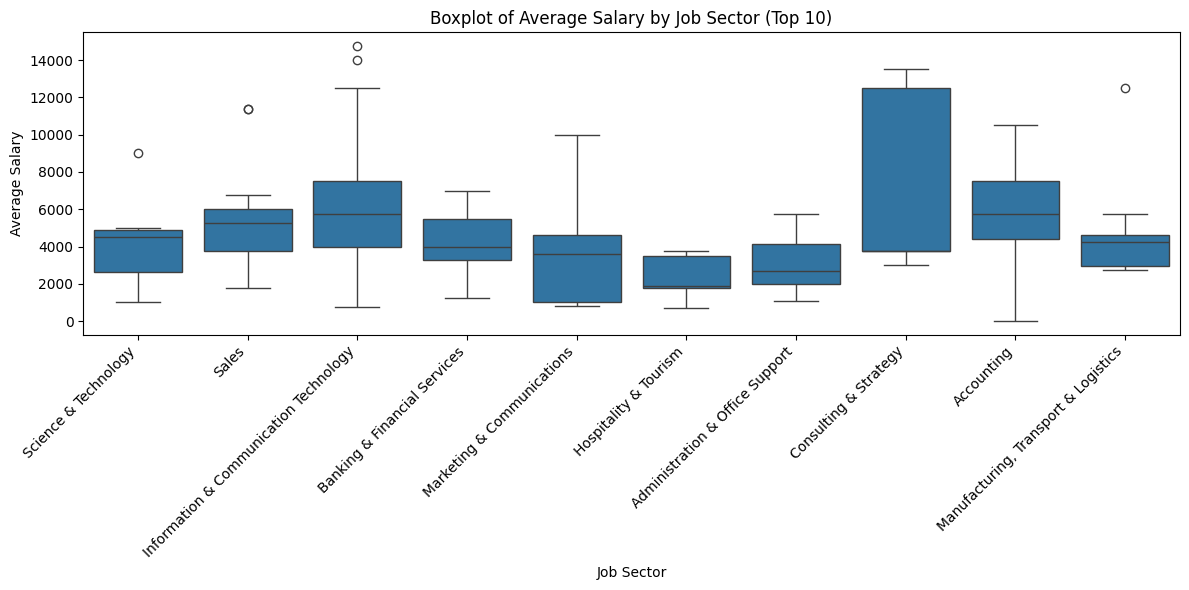

In [ ]:
# prompt: boxplot of max_salary according to industry limit to top 10 industry

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_new' is your DataFrame and it's already loaded

# Limit to the top 10 industries
top_10_sector = df_new['job_sector'].value_counts().nlargest(10).index
df_top_10 = df_new[df_new['job_sector'].isin(top_10_sector)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='job_sector', y='avg_salary', data=df_top_10)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title('Boxplot of Average Salary by Job Sector (Top 10)')
plt.xlabel('Job Sector')
plt.ylabel('Average Salary')
plt.tight_layout()
plt.show()


# 4) CLUSTERING ANALYSIS

### i) Clustering for words in description using KMeans

**Job Requirements:**

Bachelor’s Degree in Statistic, Applied Statistic, Banking Finance & Economics, Science Mathematic, Economics, and Computer Science.
Strong hands-on skill in analytical tools like SAS, SQL etc
Solid experience in banking operations, MIS system management and database marketing of at least 3-5 years.
Excellence time management & prioritization skill, able to work under pressure and good coordination skill.
Meticulous attention to details figures and processes.


**Employer questions**

Your application will include the following questions:
How many years' experience do you have as a business analyst?
What's your expected monthly basic salary?
How much notice are you required to give your current employer?

In [ ]:
#Extract requirements from 'description'
def extract_skills(description):
    try:
        start_index = description.lower().index('requirements') + len('requirements')
        end_index = description.lower().find('employer questions', start_index)
        if end_index == -1:
            return description[start_index:].strip()
        else:
            return description[start_index:end_index].strip()
    except ValueError:
        return ''

df_new['skill'] = df_new['description'].apply(extract_skills)

print(df_new['skill'])

0       :candidate must possess at least a bachelor's ...
2       :- bachelor's degree in data analytics, busine...
3       that guide the development of software solutio...
4                                                        
5       , supporting the delivery, user acceptance tes...
                              ...                        
1210    rollout the solution across your organization ...
1211                                                     
1223                                                     
1257    candidate must possess at least a bachelor's d...
1266                                                     
Name: skill, Length: 279, dtype: object


In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# Function for text cleaning
def clean_text(text):
    """
    Cleans the input text.

    Args:
        text: The input text string.

    Returns:
        The cleaned text string.
    """

    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.isalnum() and word not in stop_words]
    return " ".join(filtered_words)

# Apply the cleaning function to the 'description' column
df_new['skill'] = df_new['skill'].apply(clean_text)

# Print the cleaned descriptions
print(df_new['skill'])

0       candidate must possess least bachelors degree ...
2       bachelors degree data analytics business analy...
3       guide development software solutions process i...
4                                                        
5       supporting delivery user acceptance testing ua...
                              ...                        
1210    rollout solution across organization support s...
1211                                                     
1223                                                     
1257    candidate must possess least bachelors degree ...
1266                                                     
Name: skill, Length: 279, dtype: object


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Vectorize the words into distance
from sklearn.feature_extraction.text import TfidfVectorizer

# Feature Extraction
vectorizer = TfidfVectorizer(max_features=500)
job_skill = df_new['skill'].fillna('') # Handle missing descriptions
X = vectorizer.fit_transform(job_skill)

#Access the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Print the top 20 most important features (based on TF-IDF scores)
top_features = X.toarray()[0].argsort()[::-1][:20]
for i in top_features:
    print(feature_names[i])


data
analytics
power
business
strong
working
creating
problems
azure
others
statistical
related
economics
review
mathematics
thinking
solving
ms
clear
potential


In [ ]:
#fit the cluster model
from sklearn.cluster import KMeans
X1 = vectorizer.fit_transform(job_skill)
k = 5
model = KMeans(n_clusters=k, random_state=10)
model.fit(X1)

#list out the clusters
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

for i in range(k):
    print("Cluster %d:" % i)
    for idx in order_centroids[i, :10]:
        print(' %s' % feature_names[idx])

print('\n')

Cluster 0:
 data
 skills
 experience
 business
 work
 management
 degree
 get
 ability
 insightsregistersign
Cluster 1:
 national
 instruments
 ni
 job
 permanent
 position
 engineers
 company
 would
 current
Cluster 2:
 ms
 using
 office
 business
 software
 numerical
 pricing
 involved
 statistical
 etc
Cluster 3:
 paid
 work
 projects
 power
 sql
 science
 relevant
 get
 activities
 leave
Cluster 4:
 power
 platform
 bi
 data
 reports
 apps
 work
 skills
 customers
 effectively




#### Interpretation of the clusters generated by your KMeans clustering analysis on job descriptions:

**Cluster 0: Finance & Accounting**

This cluster focuses on financial and accounting-related skills and responsibilities.
Keywords like "financial", "cost", "accounting", "tax", and "standards" strongly suggest this focus.

**Cluster 1: General Business & Data Skills**

This cluster emphasizes general business and data-related skills.
Key Terms: "skills", "work", "experience", "business", "management", "degree", "get", "ability", "data" - This cluster highlights the need for general business knowledge, work experience, management skills, and potentially some data handling skills.

**Cluster 2: Business Intelligence & Data Analytics**

This cluster centers around Business Intelligence (BI) and Data Analytics.
Key Terms: "data", "business", "property", "skills", "bi", "power", "tools", "experience", "analytics", "technology" - This cluster suggests a focus on data analysis, business intelligence tools (like Power BI), and potentially working with property or real estate data.

**Cluster 3: Business Intelligence & Development**

This cluster strongly suggests a focus on developing and implementing Business Intelligence solutions.
Key Terms: "powerbi", "intelligence", "bi", "business", "reporting", "solutions", "developer", "implementing", "solid", "designing" - This cluster points towards roles involving the development and implementation of BI solutions, potentially using tools like Power BI.

**Cluster 4: Digital & Content**

This cluster focuses on digital media and content-related skills.
Key Terms: "content", "media", "digital", "social", "adapt", "platforms", "learn", "verbal", "excellent", "fastpaced" - This cluster suggests a focus on digital media, social media, content creation, and the ability to adapt to a fast-paced environment.

### ii) Clustering of salary level


In [ ]:
#import libraries

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


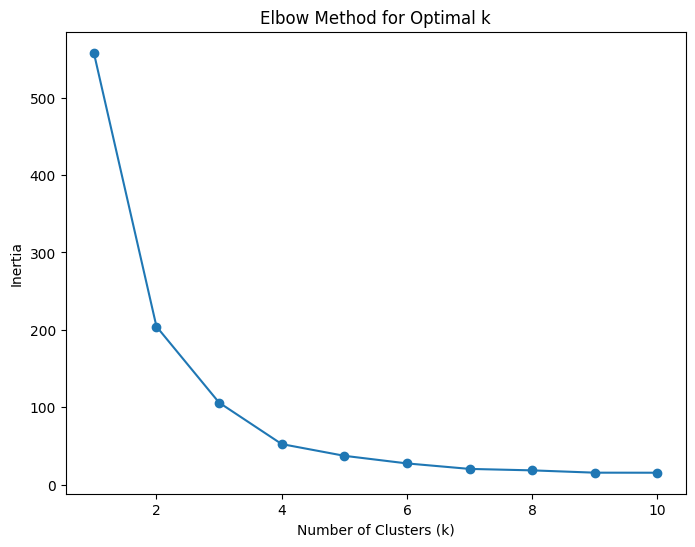

In [ ]:

# 1) Select features for clustering
features = df_new[['min_salary', 'max_salary']]

# 2) Scale the numerical features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 3) Determine the optimal number of clusters (optional)
# Using the Elbow Method to find optimal k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# 4) Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()



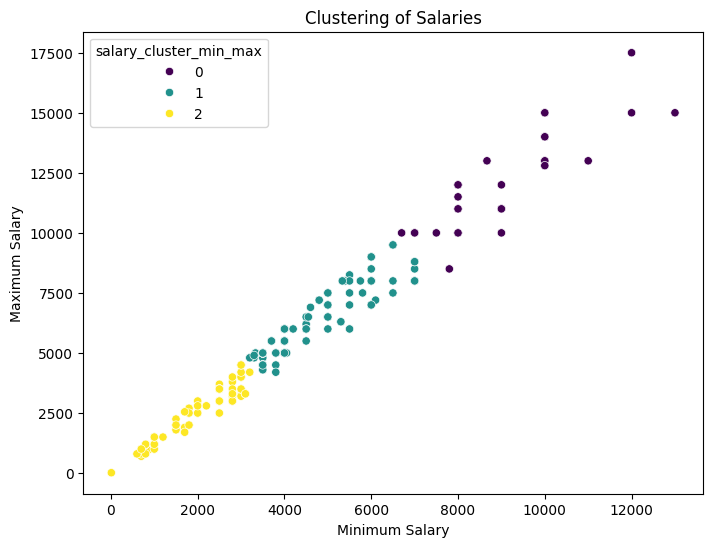

Silhouette Score: 0.5076105915696383

Cluster Counts:
salary_cluster
1    149
2     94
0     36
Name: count, dtype: int64

Cluster Means (Average Min and Max Salaries):
                         min_salary    max_salary
salary_cluster_min_max                           
0                       9101.861111  12225.000000
1                       4644.288591   6349.328859
2                       1958.617021   2582.606383


In [ ]:
# 5) Call the model. Apply number of clusters as per elbow method.
kmeans = KMeans(n_clusters=3, random_state=42)  # Example: 3 clusters

# 5) Fit and Predict the cluster on selected features. Save the cluster on a new column
df_new['salary_cluster'] = kmeans.fit_predict(features_scaled)

# 6) Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='min_salary', y='max_salary', hue='salary_cluster_min_max', data=df_new, palette='viridis')
plt.title('Clustering of Salaries')
plt.xlabel('Minimum Salary')
plt.ylabel('Maximum Salary')
plt.show()

# 7) Calculate silhouette score
silhouette_avg = silhouette_score(features_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

# 8) Analyze the clusters
cluster_counts = df_new['salary_cluster'].value_counts()
print("\nCluster Counts:")
print(cluster_counts)

cluster_means = df_new.groupby('salary_cluster_min_max')[['min_salary', 'max_salary']].mean()
print("\nCluster Means (Average Min and Max Salaries):")
print(cluster_means)

In [ ]:
# prompt: add the cluster label into dataframe df_new as column pay_level. label cluster 0 as average_pay, 1 as high_pay and 2 as low_pay

# Create the 'pay_level' column based on cluster labels
df_new['pay_level'] = df_new['salary_cluster'].map({
    0: 'high_pay',
    1: 'average_pay',
    2: 'low_pay'
})

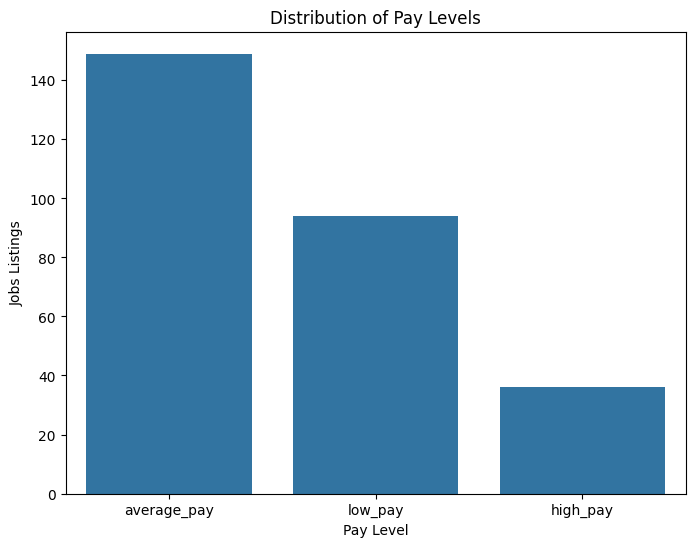

In [ ]:

plt.figure(figsize=(8, 6))
sns.countplot(x='pay_level', data=df_new)
plt.title('Distribution of Pay Levels')
plt.xlabel('Pay Level')
plt.ylabel('Jobs Listings')
plt.show()

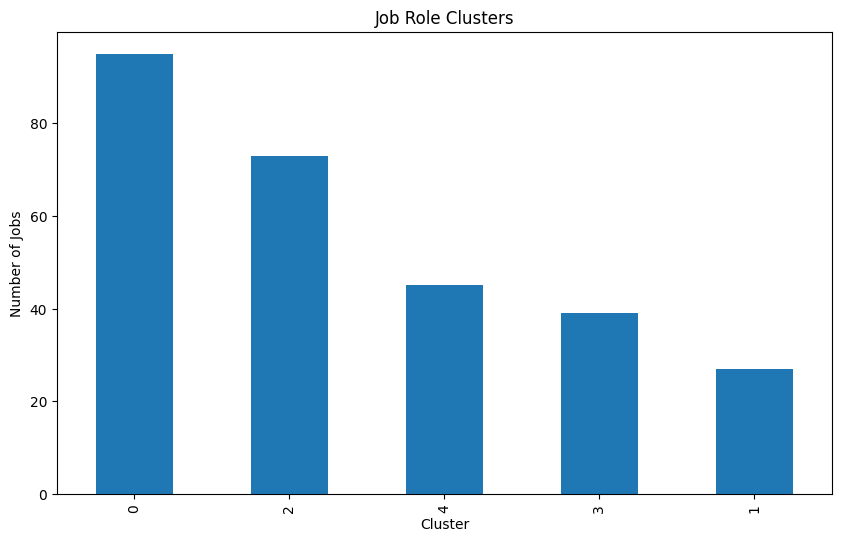

                  count
job_role_cluster       
0                    95
1                    27
2                    73
3                    39
4                    45
Silhouette Score: 0.6631809086384259


In [ ]:
# 1) Select features for clustering
features_role = df_new[['job_role']]

# 2) Process the features as necessary. Encode the 'job_role' column using Label Encoding.
le_job = LabelEncoder()
features_role['job_role'] = le_job.fit_transform(features_role['job_role'])

# 3) Call the model. Adjust number of clusters as necessary
kmeans = KMeans(n_clusters=5, random_state=42)

# 4) Fit and predict the model. Save into new column if necessary.
df_new['job_role_cluster'] = kmeans.fit_predict(features_role)

# 5) Visualize clusters (example using a bar chart)
plt.figure(figsize=(10, 6))
df_new['job_role_cluster'].value_counts().plot(kind='bar')
plt.title('Job Role Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Jobs')
plt.show()

# 6) Calculate silhouette score for clusters
print(df_new.groupby('job_role_cluster')['job_role'].agg(['count']))
silhouette_avg = silhouette_score(features_role, df_new['job_role_cluster'])
print(f"Silhouette Score: {silhouette_avg}")

In [ ]:
for cluster, data in df_new.groupby('job_role_cluster'):
    print(f"Cluster {cluster}:")
    job_roles = data['job_role'].unique()
    for jr in job_roles:
        print(f"- {jr}")
    print("\n")

Cluster 0:
- Data Entry & Word Processing
- Developers/Programmers
- Environment & Sustainability Consulting
- Engineering - Software
- Database Development & Administration
- Financial Accounting & Reporting
- Cost Accounting
- Digital & Search Marketing
- Freight/Cargo Forwarding
- Financial Planning
- Dieticians
- Funds Management
- Environmental, Earth & Geosciences
- Credit
- Foreperson/Supervisors
- Editing & Publishing


Cluster 1:
- Supervisors/Team Leaders
- Quality Assurance & Control
- Taxation
- Settlements
- Testing & Quality Assurance
- Surveying
- Strategy & Planning
- Treasury
- Purchasing, Procurement & Inventory
- Product Management & Development
- Sales Coordinators
- Security Services
- Security
- Sales Representatives/Consultants
- Psychology, Counselling & Social Work
- Travel Agents/Consultants
- Research & Fellowships
- Production, Planning & Scheduling


Cluster 2:
- Business/Systems Analysts
- Compliance & Risk
- Chemistry & Physics
- Consultants
- Client Serv

# 5) CLASSIFICATION ANALYSIS

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, roc_curve, auc
# Define features (X) and target (y)
X = df_new[['states', 'job_role', 'job_sector']]
y = df_new['pay_level']

# Encode categorical features using Label Encoding
from sklearn.preprocessing import LabelEncoder

le_states = LabelEncoder()
X['states'] = le_states.fit_transform(X['states'])

le_job_classification = LabelEncoder()
X['job_role'] = le_job_classification.fit_transform(X['job_role'])

le_industry = LabelEncoder()
X['job_sector'] = le_industry.fit_transform(X['job_sector'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters here
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
cm

Accuracy: 0.6071428571428571
Precision: 0.5307539682539683
Recall: 0.6071428571428571
F1-score: 0.5648351648351648
Confusion Matrix:


array([[22,  3,  4],
       [ 9,  0,  1],
       [ 5,  0, 12]])

      Feature  Importance
1    job_role    0.456695
2  job_sector    0.348183
0      states    0.195122


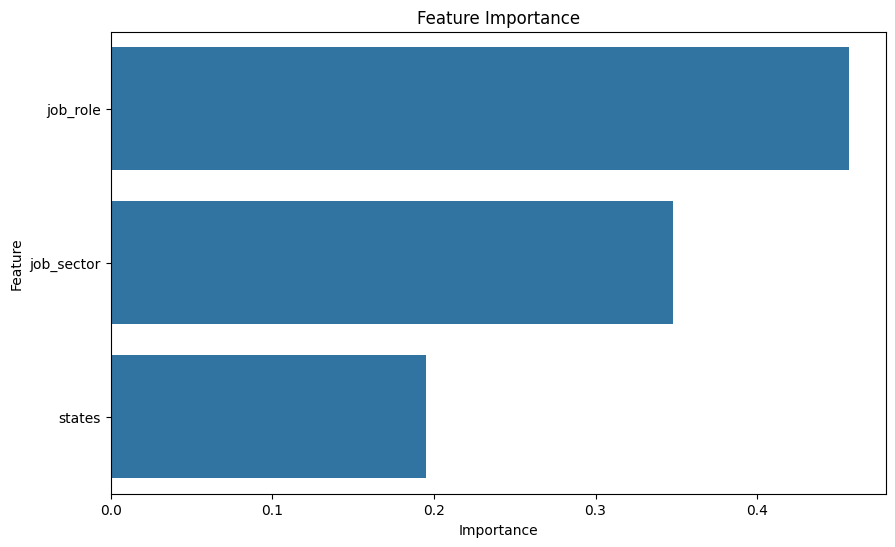

In [ ]:
# prompt: feature importance analysis
# Feature Importance Analysis
feature_importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the data (assuming 'df_new' is your DataFrame)
# ... (Your existing code to load and preprocess the data) ...

# Define features (X) and target (y)
X = df_new[['states', 'job_role', 'job_sector', 'avg_salary']]
y = df_new['pay_level']

# Encode categorical features using Label Encoding
le_states = LabelEncoder()
X['states'] = le_states.fit_transform(X['states'])

le_job_role = LabelEncoder()
X['job_role'] = le_job_role.fit_transform(X['job_role'])

le_job_sector = LabelEncoder()
X['job_sector'] = le_job_sector.fit_transform(X['job_sector'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

#Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


# DISCUSSION FINDINGS

##**EXPLORATORY DATA ANALYSIS**

**1. Job Roles and Sectors:**
- The analysis revealed the most common job roles related to "data analyst" positions.
- The top job roles were identified, and the corresponding job sectors for each role were listed, providing insights into the industries hiring for data analyst positions.
- The analysis shows that most job roles and sector are related to business intelligence and analysis



**2. Salary Distribution:**
- A boxplot visualization showed the distribution of average salaries across different job sectors.
- This helped identify sectors with higher or lower average salaries, providing insights into salary expectations for data analyst positions in specific industries.


##**CLUSTERING ANALYSIS**

**1. Job Description Clustering (KMeans):**
- KMeans clustering was applied to the tokenized words in 'skills' column. TF-IDF was applied to see most influential words.
- Five clusters were identified, each representing a distinct set of skills and qualifications sought by employers.
- Each cluster was characterized by prominent keywords, suggesting the focus of the job roles.
 - Cluster 0: Finance & Accounting
 - Cluster 1: General Business & Data Skills
 - Cluster 2: Business Intelligence & Data Analytics
 - Cluster 3: Business Intelligence & Development
 - Cluster 4: Digital & Content

**2. Salary Level Clustering**
 - KMeans clustering was used to group job listings based on their average salary levels.
 - Three salary clusters (high, low, and average) were identified.
 - Visualization helped understand the distribution of salaries across the clusters.
 - A silhouette score was calculated to evaluate the quality of the clusters.

**3. Job Role Clustering**
- KMeans clustering was applied to job roles to group similar positions.
- Five clusters of job roles were identified.
- The analysis provided insights into the relationships between different job titles and roles.
- A silhouette score was calculated to evaluate the quality of the clusters.


## **CLASSIFICATION ANALYSIS**

 - A RandomForestClassifier was used to predict salary levels (high, low, average) based on 'states', 'job_sector', and 'job_role'
 - Evaluation metrics such as accuracy, precision, recall, and F1-score were calculated to assess the model's performance.
 - A confusion matrix visualized the model's predictions against actual salary levels.
 - Feature importances were calculated to identify which features (location, role, sector) were most influential in predicting salary levels.


## **CONCLUSION**
Overall, the analysis provided insights into various aspects of data analyst jobs, including job roles, salary distribution, skill requirements, and relationships between different features.